In [9]:
import TensorFrost as tf
import numpy as np
import matplotlib.pyplot as plt

N = 128

def WaveEq():
    u = tf.input([-1, -1], tf.float32)
    v = tf.input([-1, -1], tf.float32)

    i,j = u.indices

    laplacian = u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1] - u * 4.0 - 0.125 * tf.sin(2.0*np.pi*u)

    print("hello")

    dt = 0.2
    v_new = v + dt*laplacian
    u_new = u + dt*v_new

    return [u_new, v_new]

tf.initialize(tf.cpu, "H:/tinycc/win32/tcc.exe")
test = tf.program(WaveEq)
#test.list_operations(compact=True)
#test.kernel_c()


dim =  2
hello


In [10]:
#intialize as a gaussian pulse in the middle
Anp = np.zeros((N, N))
Bnp = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        Anp[i, j] = np.exp(-((i-N/3)**2 + (j-N/3)**2)/10)

A = tf.memory(Anp)
B = tf.memory(Bnp)
A, B = test(A, B)

print("Used memory: " + str(tf.used_memory()))

Used memory: 65540


In [11]:
#do a few steps and measure performance by timing every 100 steps
import time
start = time.time()

print("Used memory: " + str(tf.used_memory()))

for i in range(500):
    A, B = test(A, B)
    if i % 100 == 99:
        print("Iterations per second: " + str(100/(time.time()-start)))
        start = time.time()

print("Used memory: " + str(tf.used_memory()))

Used memory: 65540
Iterations per second: 452.4853605595999
Iterations per second: 442.4819390993181
Iterations per second: 446.4276667170467
Iterations per second: 452.4887776028895
Iterations per second: 444.4451037758142
Used memory: 65540


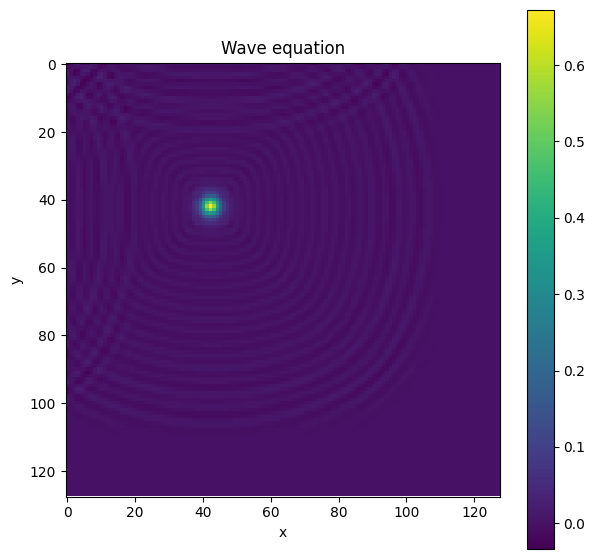

In [12]:
# Plot the results (with colorbar)
plt.figure(figsize=(7,7))
plt.imshow(A.numpy)
plt.colorbar()
plt.title("Wave equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

